In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import itertools
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
data = pd.read_csv('gini_income_crime_avs.csv')

In [5]:
data.head()

,State,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_white_poverty,share_non_white,share_voters_voted_trump,share_hate_crimes_per_pop
0,Alabama,0.47378,57249.0,0.060,0.64,0.821,0.12,0.35,0.63,0.000007
1,Alaska,0.41454,85900.6,0.064,0.63,0.914,0.06,0.42,0.53,0.000010
2,Arizona,0.46082,61933.6,0.063,0.90,0.842,0.09,0.49,0.50,0.000034
3,Arkansas,0.46580,53459.4,0.052,0.69,0.824,0.12,0.26,0.60,0.000004
4,California,0.48148,74437.2,0.059,0.97,0.806,0.09,0.61,0.33,0.000023


In [29]:
#preprocessing
data.columns = [col.replace(' ', '_') for col in data.columns]
for col in x_cols:
    data[col] = (data[col] - data[col].mean())/data[col].std()
data

,State,mean_gini,mean_medians,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_white_poverty,share_non_white,share_voters_voted_trump,share_hate_crimes_per_pop
0,Alabama,0.683058,-1.145759,0.975064,-0.606849,-1.412183,1.142443,0.208069,1.179347e+00,-0.637700
1,Alaska,-2.096311,1.444590,1.348961,-0.661919,1.317232,-1.285248,0.632530,3.369564e-01,-0.518836
2,Arizona,0.075012,-0.722231,1.255487,0.824969,-0.795863,-0.071403,1.056990,8.423909e-02,0.400425
3,Arkansas,0.308659,-1.488371,0.227271,-0.331499,-1.324137,1.142443,-0.337666,9.266300e-01,-0.739196
4,California,1.044319,0.408201,0.881590,1.210458,-1.852411,-0.071403,1.784637,-1.347825e+00,0.002927
5,Colorado,-0.053541,0.757630,-0.894420,0.274270,0.700912,-0.880633,-0.034480,-4.211955e-01,-0.116708
6,Connecticut,1.490970,1.889147,0.227271,1.045249,0.495472,-1.285248,-0.095117,-6.739127e-01,0.323241
7,Delaware,-0.768557,0.337068,-0.053152,0.824969,0.143290,-0.476018,0.329343,-5.896737e-01,-0.255639
8,District of Columbia,3.304785,1.929180,1.629384,1.375668,0.055244,-2.094478,1.905911,-3.790759e+00,5.942675
9,Florida,1.003032,-0.940133,0.227271,1.155389,-0.473029,0.737828,0.875078,-2.259766e-17,-0.613773


In [44]:
kf = KFold(n_splits=3, shuffle=True)

In [30]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

#problems: r2 low

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     share_hate_crimes_per_pop   R-squared:                       0.553
Model:                                   OLS   Adj. R-squared:                  0.467
Method:                        Least Squares   F-statistic:                     6.486
Date:                       Wed, 15 Jan 2020   Prob (F-statistic):           1.76e-05
Time:                               17:11:04   Log-Likelihood:                -51.348
No. Observations:                         51   AIC:                             120.7
Df Residuals:                             42   BIC:                             138.1
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                -6.939e-18      0.102  -6.79e-17      1.000      -0.206       0.206
mean_gini                                    0.6314      0.175      3.612      0.001       0.279       0.984
mean_medians                                 0.1279      0.207      0.619      0.539      -0.289       0.545
share_unemployed_seasonal                    0.1789      0.141      1.269      0.211      -0.106       0.464
share_population_in_metro_areas             -0.2407      0.159     -1.515      0.137      -0.561       0.080
share_population_with_high_school_degree     0.3509      0.262      1.338      0.188      -0.178       0.880
share_white_poverty                          0.0812      0.185      0.439      0.663      -0.292       0.454
share_non_white                             -0.1666      0.169     -0.987      0.329      -0.507       0.174
share_voters_voted_trump                    -0.4285      0.184     -2.328      0.025      -0.800      -0.057
==============================================================================
Omnibus:                       13.773   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.391
Skew:                           0.955   Prob(JB):                     0.000167
Kurtosis:                       5.129   Cond. No.                         5.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = data[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('mean_gini', 2.869753338918711),
 ('mean_medians', 4.0083608216244855),
 ('share_unemployed_seasonal', 1.866829779246359),
 ('share_population_in_metro_areas', 2.3695394083684187),
 ('share_population_with_high_school_degree', 6.459059070748288),
 ('share_white_poverty', 3.2074320606535895),
 ('share_non_white', 2.671375013157261),
 ('share_voters_voted_trump', 3.1812026716315946)]

In [33]:
#remove 'share_population_with_high_school_degree', VIF >5
outcome = 'share_hate_crimes_per_pop'
x_cols = ['mean_gini', 'mean_medians', 'share_unemployed_seasonal', 'share_white_poverty', 'share_non_white', 'share_voters_voted_trump']

In [34]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     share_hate_crimes_per_pop   R-squared:                       0.490
Model:                                   OLS   Adj. R-squared:                  0.421
Method:                        Least Squares   F-statistic:                     7.057
Date:                       Wed, 15 Jan 2020   Prob (F-statistic):           2.63e-05
Time:                               17:12:15   Log-Likelihood:                -54.671
No. Observations:                         51   AIC:                             123.3
Df Residuals:                             44   BIC:                             136.9
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -6.939e-18      0.107  -6.51e-17      1.000      -0.215       0.215
mean_gini                     0.3991      0.140      2.858      0.006       0.118       0.680
mean_medians                  0.2004      0.197      1.015      0.316      -0.197       0.598
share_unemployed_seasonal     0.0868      0.141      0.615      0.542      -0.198       0.371
share_white_poverty           0.0789      0.180      0.437      0.664      -0.285       0.443
share_non_white              -0.3528      0.142     -2.485      0.017      -0.639      -0.067
share_voters_voted_trump     -0.4873      0.174     -2.800      0.008      -0.838      -0.137
==============================================================================
Omnibus:                       27.221   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.477
Skew:                           1.398   Prob(JB):                     1.83e-16
Kurtosis:                       8.128   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

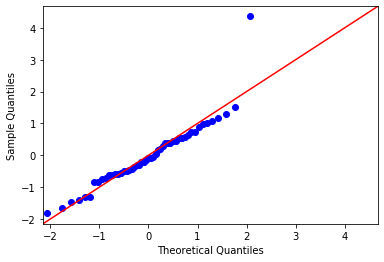

In [36]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
#some violations to the model but overall an okay fit

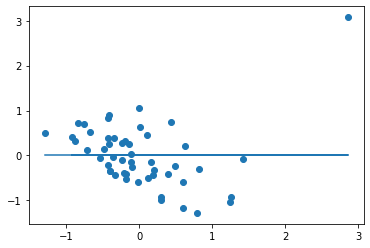

In [39]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))])

#outliers displaying disproportionate errors, consider removing outliers

In [ ]:
#remove